In [3]:
import json
import os
from datetime import datetime

import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr
from textblob_de import TextBlobDE

# Initialize a list to store the dates of the posts
dates = []

# Initialize a list to store the lists of sentiment polarities for each json file
avg_comment_sentiments = []

# Loop through all the json files in the "comments_json" folder
for filename in sorted(os.listdir("comments_json")):
    # Check if the file is a json file
    if filename.endswith(".json"):
        # Load the json file
        with open(f"comments_json/{filename}", "r",encoding="utf-8") as f:
            data = json.load(f)

        # Extract the date of the post from the filename
        date = datetime.strptime(filename.split("_")[0], "%Y-%m-%d")

        # Add the date to the list of dates
        dates.append(date)

        # Initialize a list to store the sentiment polarities for the json file
        file_sentiments = []

        # Loop through all the comments in the json data
        for comment in data:
            # Create a TextBlobDE object for the comment
            textblob = TextBlobDE(comment["text"])

            # Get the sentiment polarity of the comment
            polarity = textblob.sentiment.polarity

            # Add the sentiment polarity to the list of sentiment polarities for the json file
            file_sentiments.append(polarity)
            if "answers" in comment:
                for answer in comment["answers"]:
                    textblob = TextBlobDE(answer["text"])

            # Get the sentiment polarity of the comment
                    polarity = textblob.sentiment.polarity

                    # Add the sentiment polarity to the list of sentiment polarities for the json file
                    file_sentiments.append(polarity)

        # Add the list of sentiment polarities for the json file to the list of all sentiment polarities
        avg_comment_sentiments.append(
            sum(file_sentiments)/len(file_sentiments))


In [4]:
# Initialize a list to store the lists of sentiment polarities for each json file
avg_caption_sentiments = []

# Loop through all the json files in the "comments_json" folder
for filename in sorted(os.listdir("comments_json")):
  # Check if the file is a json file
  if filename.endswith(".txt"):
    # Load the json file
    with open(f"comments_json/{filename}", "r",encoding="utf-8") as f:
      data = f.readlines()

    # Initialize a list to store the sentiment polarities for the json file
    file_sentiments = []

    # Loop through all the comments in the json data
    for line in data:
      # Create a TextBlobDE object for the comment
      textblob = TextBlobDE(line)

      # Get the sentiment polarity of the comment
      polarity = textblob.sentiment.polarity

      # Add the sentiment polarity to the list of sentiment polarities for the json file
      file_sentiments.append(polarity)

    # Add the list of sentiment polarities for the json file to the list of all sentiment polarities
    avg_caption_sentiments.append(sum(file_sentiments)/len(file_sentiments))


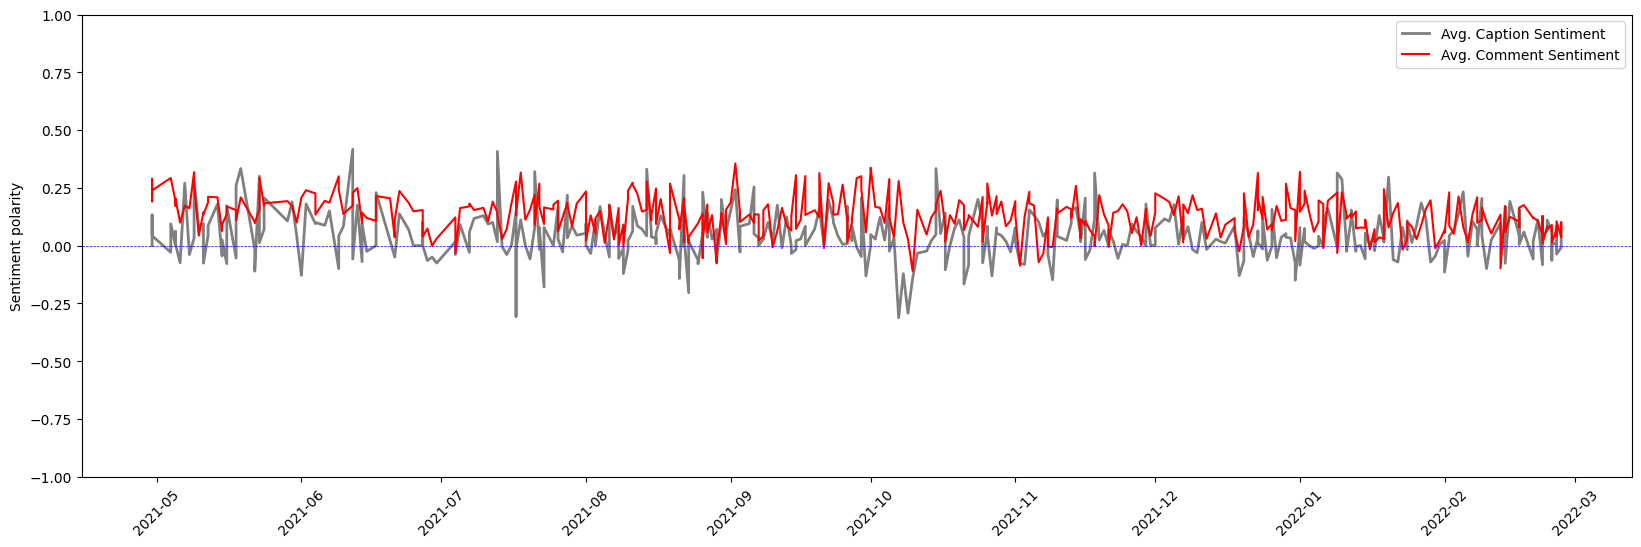

In [5]:
# Create a larger figure
plt.figure(figsize=(20, 6))

# Create a box plot of the sentiment polarities for each json file
plt.plot(dates, avg_caption_sentiments,color="gray",linewidth=2,label="Avg. Caption Sentiment")
plt.plot(dates, avg_comment_sentiments,color="r",label="Avg. Comment Sentiment")
plt.axhline(0,color="blue",linestyle="dashed",linewidth=0.5)
# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.ylim(-1,1)
# Add a label to the y-axis
plt.ylabel("Sentiment polarity")
plt.legend()
# Show the plot
plt.show()


avg. caption sentiment to avg. comment sentiment
Pearson correlation coefficient: 0.2269042768
p-value for the correlation: 0.0000044416
avg. caption sentiment to count of comments
Pearson correlation coefficient: 0.0015084908
p-value for the correlation: 0.9759767542
avg. comment sentiment to count of likes
Pearson correlation coefficient: 0.1862977416
p-value for the correlation: 0.0001755274
avg. caption sentiment to count of likes
Pearson correlation coefficient: 0.0983342397
p-value for the correlation: 0.0490949748


Text(0.5, 0.98, 'Sentiment Correlation Analysis')

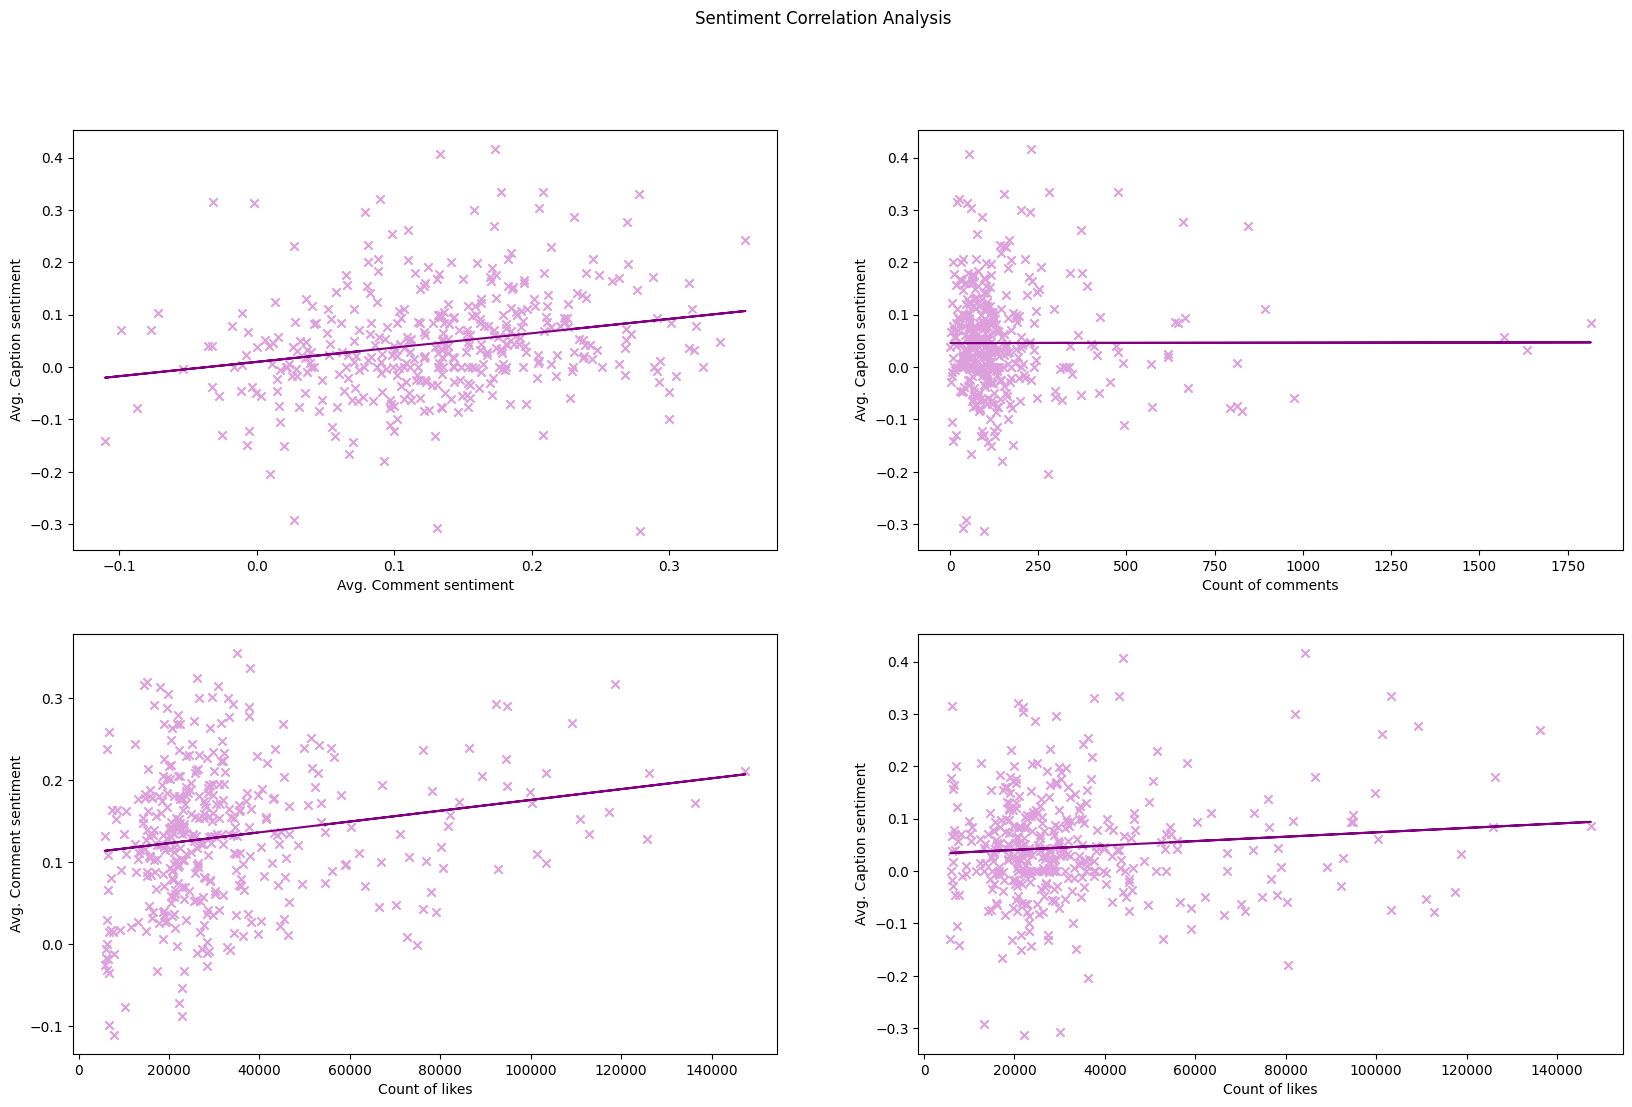

In [20]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,12))


ax1.scatter(avg_comment_sentiments, avg_caption_sentiments,color="plum",marker="x")
slope, intercept, r_value, p_value, std_err = linregress(avg_comment_sentiments, avg_caption_sentiments)

y_values = [slope * x + intercept for x in avg_comment_sentiments]

ax1.plot(avg_comment_sentiments, y_values, color="purple")
ax1.set_xlabel("Avg. Comment sentiment")
ax1.set_ylabel("Avg. Caption sentiment")

corr, p_value = pearsonr(avg_comment_sentiments, avg_caption_sentiments)
print('avg. caption sentiment to avg. comment sentiment')
print(f"Pearson correlation coefficient: {format(corr, '.10f')}")
print(f"p-value for the correlation: {format(p_value,'.10f')}")


comments = []
likes = []

for filename in os.listdir("ichbinsophiescholl"):
  if filename.endswith(".json"):
    with open(f"ichbinsophiescholl/{filename}", "r") as f:
      data = json.load(f)

    comments.append(data["node"]["edge_media_to_comment"]["count"])
    likes.append(data["node"]["edge_media_preview_like"]["count"])

ax2.scatter(comments, avg_caption_sentiments,color="plum",marker="x")
slope, intercept, r_value, p_value, std_err = linregress(comments, avg_caption_sentiments)

y_values = [slope * x + intercept for x in comments]

ax2.plot(comments, y_values, color="purple")
ax2.set_xlabel("Count of comments")
ax2.set_ylabel("Avg. Caption sentiment")

corr, p_value = pearsonr(comments, avg_caption_sentiments)
print('avg. caption sentiment to count of comments')
print(f"Pearson correlation coefficient: {format(corr, '.10f')}")
print(f"p-value for the correlation: {format(p_value,'.10f')}")

ax3.scatter(likes, avg_comment_sentiments,color="plum",marker="x")
slope, intercept, r_value, p_value, std_err = linregress(likes, avg_comment_sentiments)

y_values = [slope * x + intercept for x in likes]

ax3.plot(likes, y_values, color="purple")
ax3.set_xlabel("Count of likes")
ax3.set_ylabel("Avg. Comment sentiment")

corr, p_value = pearsonr(likes, avg_comment_sentiments)

print('avg. comment sentiment to count of likes')
print(f"Pearson correlation coefficient: {format(corr, '.10f')}")
print(f"p-value for the correlation: {format(p_value,'.10f')}")

ax4.scatter(likes, avg_caption_sentiments,color="plum",marker="x")
slope, intercept, r_value, p_value, std_err = linregress(likes, avg_caption_sentiments)

y_values = [slope * x + intercept for x in likes]

ax4.plot(likes, y_values, color="purple")
ax4.set_xlabel("Count of likes")
ax4.set_ylabel("Avg. Caption sentiment")

corr, p_value = pearsonr(likes, avg_caption_sentiments)
print('avg. caption sentiment to count of likes')
print(f"Pearson correlation coefficient: {format(corr, '.10f')}")
print(f"p-value for the correlation: {format(p_value,'.10f')}")

fig.suptitle("Sentiment Correlation Analysis")

Pearson correlation coefficient: 0.0571366919
p-value for the correlation: 0.2536526016


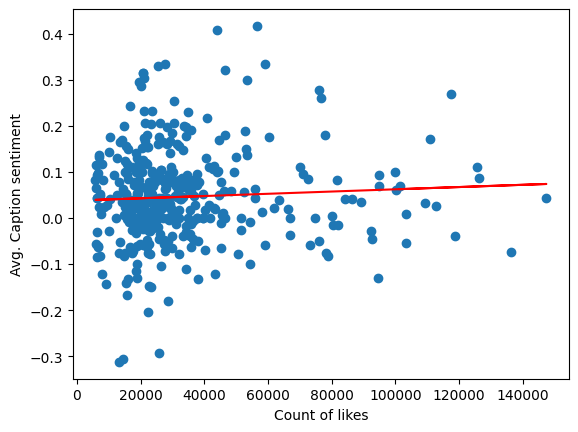

In [ ]:
ax4.scatter(likes, avg_caption_sentiments)
slope, intercept, r_value, p_value, std_err = linregress(likes, avg_caption_sentiments)

y_values = [slope * x + intercept for x in likes]

ax4.plot(likes, y_values, color="r")
ax4.set_xlabel("Count of likes")
ax4.set_ylabel("Avg. Caption sentiment")

corr, p_value = pearsonr(likes, avg_caption_sentiments)
print('avg. caption sentiment to count of likes')
print(f"Pearson correlation coefficient: {format(corr, '.10f')}")
print(f"p-value for the correlation: {format(p_value,'.10f')}")
